<a href="https://colab.research.google.com/github/anaperez10/AnaliticaIII-Marketing/blob/main/Avances1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGA DE PAQUETES

In [29]:
#Importar paquetes
import pandas as pd
import numpy as np
import sqlite3 as sql

import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedKFold
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.extmath import weighted_mode
weighted_mode
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from mlxtend.preprocessing import TransactionEncoder
import os

IMPORTAR Y LEER TABLAS SQL

In [30]:
#Ejecutar sql, conectar a bd y cargar tabla sql 
conn = sql.connect('/content/db_movies')
cur=conn.cursor()


In [31]:
#Crear una función para ejecutar un archivo sql
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

DEPURACIÓN DE TABLAS SQL

- Tabla movies

In [32]:
#Leer la tabla de movies del archivo sql
movies1 = pd.read_sql('select * FROM movies',conn)
movies1.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Observar columnas de movies
print('Columnas:',movies1.columns)
#Dimensiones de la base
print('Dimensiones:', movies1.shape)

Columnas: Index(['movieId', 'title', 'genres'], dtype='object')
Dimensiones: (9742, 3)


In [ ]:
#Conocer el tipo de variables
print(movies1.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [ ]:
#Información general
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
#Descripción general
movies1.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


- Tabla ratings

In [ ]:
#Leer la tabla rating del archivo sql
ratings1= pd.read_sql('select * FROM ratings',conn)
ratings1.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Observar columnas de movies
print('Columnas:',ratings1.columns)
#Dimensiones de la base
print('Dimensiones:', ratings1.shape)

Columnas: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Dimensiones: (100836, 4)


In [ ]:
#Conocer el tipo de variables
print(ratings1.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [ ]:
#Información general
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
#Descripción general
ratings1.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
#Modificar formato de timestamp a datetime
from datetime import datetime
ratings1['timestamp']= pd.to_datetime(ratings1['timestamp'])
ratings1

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-01 00:00:00.964982703
1,1,3,4.0,1970-01-01 00:00:00.964981247
2,1,6,4.0,1970-01-01 00:00:00.964982224
3,1,47,5.0,1970-01-01 00:00:00.964983815
4,1,50,5.0,1970-01-01 00:00:00.964982931
...,...,...,...,...
100831,610,166534,4.0,1970-01-01 00:00:01.493848402
100832,610,168248,5.0,1970-01-01 00:00:01.493850091
100833,610,168250,5.0,1970-01-01 00:00:01.494273047
100834,610,168252,5.0,1970-01-01 00:00:01.493846352


NUEVA BASE DE DATOS

In [ ]:
#Crear base de datos con la unión de las tablas de movies y ratings
movie_ratings = pd.merge(ratings1,movies1, how="left", right_on="movieId", left_on="movieId")
movie_ratings.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1970-01-01 00:00:00.964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,1970-01-01 00:00:00.964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,1970-01-01 00:00:00.964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,1970-01-01 00:00:00.964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,1970-01-01 00:00:00.964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
#Observar si hay datos nulos 
movie_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
#Verificar si hay datos duplicados 
movie_ratings.duplicated().sum()

0

In [ ]:
#Observar columnas de la nueva base de datos
movie_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

ANÁLISIS EXPLORATORIO

In [ ]:
# crear dataset
base = movie_ratings.groupby(['title'])[['rating']].count().sort_values('rating', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'title', y='rating',
             title= '<b>Películas con mayores calificaciones<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Películas',
    yaxis_title = 'Calificación',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = movie_ratings.groupby(['rating'])[['genres']].sum().sort_values('rating', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'rating', names ='genres',
             title= '<b>Participación por barrio en el valor de los edificios vendidos<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#Calcular la correlación
movie_ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


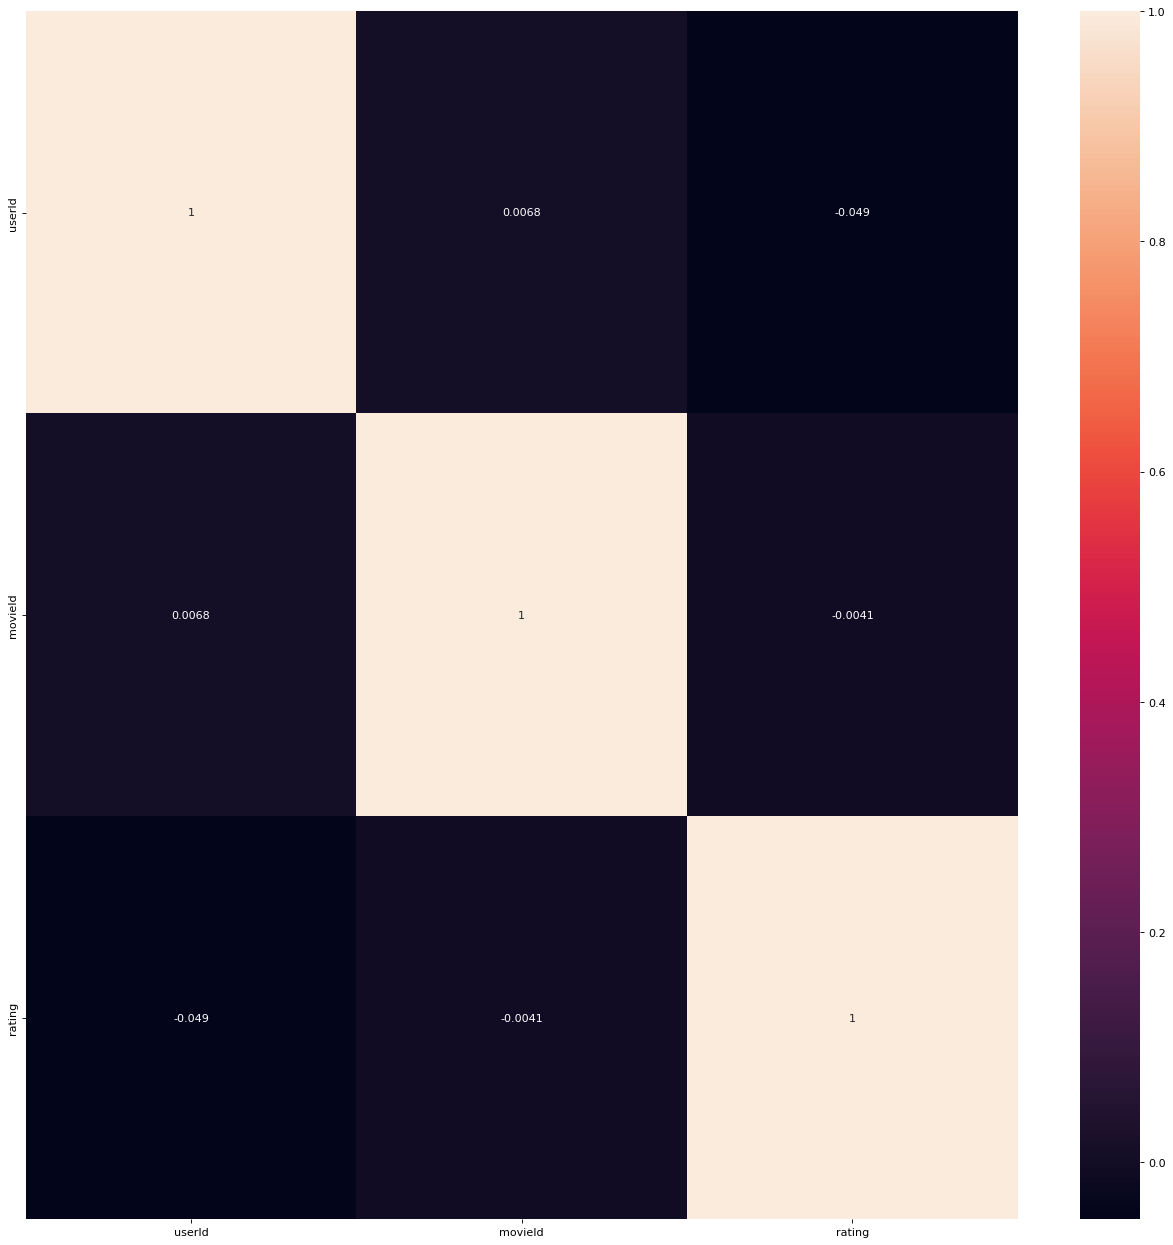

In [ ]:
#Para interpretar mejor las correlaciones se pueden usar gráficos
figure(figsize=(20, 20), dpi=80);
sns.heatmap(movie_ratings.corr(), annot = True);

In [ ]:
#Generar dummies del campo genero de pelicula
genres = movie_ratings['genres'].str.split('|')
